<a href="https://colab.research.google.com/github/aalr007/VisionComputacional/blob/main/4_convolutionALR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> 4. Image Convolution </center>
## Materia: Visión computacional para imágenes y video
## Profesor: Gilberto Ochoa Ruiz
## Alumnos:
* Alberto Nieves Cisneros            A01793829
* Aurelio Antonio Lozano Rábago      A01081266
* Héctor Manuel González Villareal   A00178679
* Jessica Lechuga Ramos              A01793512
* Luis Alfredo Negron Naldos         A01793865

## 30 de Enero del 2023

## Table of Contents
1. [Libraries](#libraries)
2. [Simple Example](#simple)
3. [PyTorch Convolution](#pytorch)
3. [Exercises](#exercises)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## Simple Convolution <a class="anchor" id="simple" ></a>

### Definition

- __I__: Image to convolve.
- __H__: filter matrix to convolve the image with.
- __J__: Result of the convolution.

The following graphics shows exemplary the mathematical operations of the convolution. The filter matrix __H__ is shifted over the input image __I__. The values 'under' the filter matrix are multiplicated with the corresponding values in __H__, summed up and writen to the result __J__. The target position is usually the position under the center of __H__.

<img src="https://github.com/aalr007/VisionComputacional/blob/main/data/convolution.png?raw=1" width="70%">

In order to implement the convolution with a block filter, we need two methods. The first one will create the block filter matrix __H__ depending on the filter width/height __n__. 

A block filter holds the value $\dfrac{1}{n\cdot n}$ at each position:

In [3]:
def block_filter(n):
    H = np.ones((n, n)) / (n * n) # each element in H has the value 1/(n*n) matriz de 5x5 de puros 1 dividida entre la multiplicacion del tamaño de renglon o columna (n)
    return H

We will test the method by creating a filter with ``n = 5``:

In [4]:
H = block_filter(5)
print(H)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


Next, we define the actual convolution operation. To prevent invalid indices at the border of the image, we introduce the padding __p__.

In [5]:
def apply_filter(I, H):
    h, w = I.shape                         # image dimensions (height, width)
    n = H.shape[0]                         # filter size
    p = n // 2                             # padding size
    J = np.zeros_like(I)                   # output image, initialized with zeros

    for x in range(p, h-p):
        for y in range(p, w-p):
            J[x, y] = np.sum(I[x-p:x+n-p, y-p:y+n-p] * H)
            
    return J

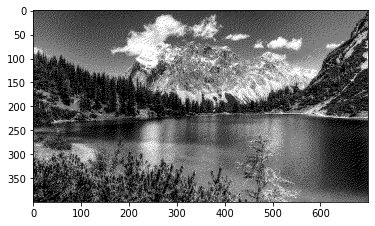

In [6]:
image = Image.open('sample_data/image.jpg')
image = image.convert('1') # convert image to black and white

image = np.array(image)

# image = np.zeros((200, 200), dtype=np.float)
# for x in range(200):
#     for y in range(200):
#         d = ((x-100)**2+(y-100)**2)**0.5
#         image[x, y] = d % 8 < 4

plt.imshow(image, cmap='gray',vmin=0.0, vmax=1.0)
plt.show()

In [7]:
image = image.astype(float)

Next we test our implementation and apply a block filter with size 7

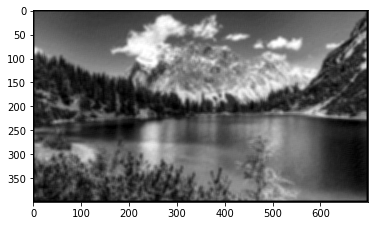

In [8]:
n = 7
H = block_filter(n)
J = apply_filter(image, H)

plt.imshow(J, cmap='gray')
plt.show()

In [9]:
print(H)

[[0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]]


## PyTorch Convolution <a class="anchor" id="pytorch" ></a>

In [10]:
from PIL import Image

img = Image.open('sample_data/image.jpg')
img.thumbnail((256,256), Image.ANTIALIAS) # Resize to half to reduce the size of this notebook.

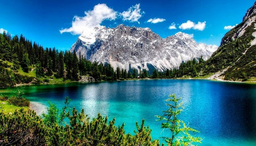

In [11]:
img

In [12]:
import torch, torchvision
from torchvision import transforms
from torch import nn

In [13]:
to_tensor = transforms.Compose([
   transforms.Grayscale(),  # Convert image to grayscale.
   transforms.ToTensor()    # Converts a PIL Image in the range [0, 255] to a torch.FloatTensor in the range [0.0, 1.0].
])

to_pil = transforms.Compose([
    transforms.ToPILImage()
])

In [14]:
input = to_tensor(img)
input.shape


torch.Size([1, 146, 256])

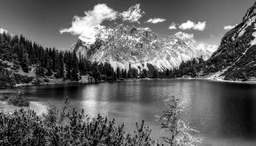

In [15]:
to_pil(input)

2D convolution over an input image:

+ `in_channels = 1`: an input is a grayscale image
+ `out_channels = 1`: an output is a grayscale image
+ `kernel_size = (3, 3)`: the kernel (filter) size is 3 x 3
+ `stride = 1`: the stride for the cross-correlation is 1
+ `padding = 1`: zero-paddings on both sides for 1 point for each dimension
+ `bias = False`: no bias parameter (for simplicity)

In [16]:
conv = nn.Conv2d(1, 1, (3, 3), stride=1, padding=1, bias=False)

In [17]:
# The code below does not work because the convolution layer requires the dimension for batch.
conv(input)

tensor([[[-0.2406, -0.2402, -0.2391,  ..., -0.3291, -0.3021, -0.1137],
         [-0.2728, -0.3433, -0.3388,  ..., -0.4516, -0.3443, -0.1446],
         [-0.2823, -0.3493, -0.3414,  ..., -0.4047, -0.2721, -0.1572],
         ...,
         [-0.0579, -0.1657, -0.1419,  ..., -0.3608, -0.3541, -0.1679],
         [-0.0829, -0.1845, -0.0785,  ..., -0.3875, -0.3822, -0.1790],
         [-0.0599, -0.0726, -0.0647,  ..., -0.2540, -0.2541, -0.1269]]],
       grad_fn=<SqueezeBackward1>)

We need to insert a dimension for a batch at dim=0.

In [18]:
input = input.unsqueeze(0)
input.shape

torch.Size([1, 1, 146, 256])

In [19]:
output = conv(input)
output.shape

torch.Size([1, 1, 146, 256])

Setting `padding=1` in the convolution layer, we obtain an image of the same size.

In [20]:
output.shape

torch.Size([1, 1, 146, 256])

We need to remove the first dimension before converting to a PIL object.

In [21]:
output.data.squeeze(dim=0).shape

torch.Size([1, 146, 256])

Display the output from the convolution layer by converting `output` to a PIL object.

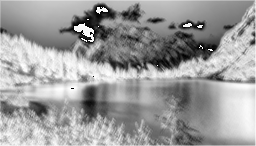

In [22]:
to_pil(output.data.squeeze(dim=0))

Clip every value in the output tensor within the range of [0, 1].

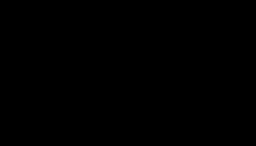

In [23]:
to_pil(torch.clamp(output, 0, 1).data.squeeze(dim=0))

In [24]:
def display(img1, img2):
    im1 = to_pil(torch.clamp(img1, 0, 1).data.squeeze(dim=0))
    im2 = to_pil(torch.clamp(img2, 0, 1).data.squeeze(dim=0))
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

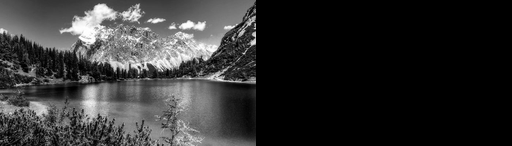

In [25]:
display(input, output)

### Identity

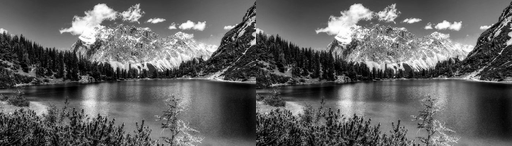

In [26]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 1, 0.],
    [0., 0., 0.],
]]])

output = conv(input)
display(input, output)

### Brighten

tensor([[[[0.0000, 0.0000, 0.0000],
          [0.0000, 1.5000, 0.0000],
          [0.0000, 0.0000, 0.0000]]]])


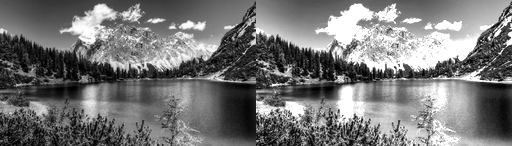

In [27]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 1.5, 0.],
    [0., 0., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

### Darken

tensor([[[[0.0000, 0.0000, 0.0000],
          [0.0000, 0.5000, 0.0000],
          [0.0000, 0.0000, 0.0000]]]])


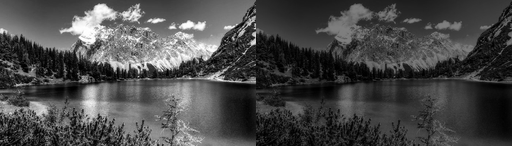

In [28]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 0.5, 0.],
    [0., 0., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

### Box blur

tensor([[[[0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111]]]])


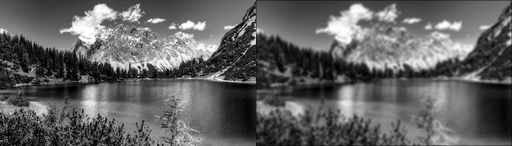

In [29]:
conv.weight.data = torch.ones((1, 1, 3,3), dtype=torch.float) / 9.
print(conv.weight.data)
output = conv(input)
display(input, output)

### Gaussian blur

tensor([[[[0.0625, 0.1250, 0.0625],
          [0.1250, 0.2500, 0.1250],
          [0.0625, 0.1250, 0.0625]]]])


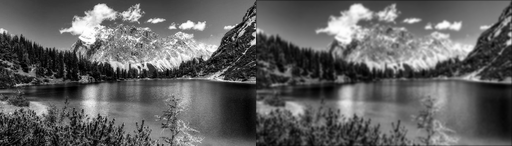

In [30]:
conv.weight.data = torch.tensor([[[
    [1., 2., 1.],
    [2., 4., 2.],
    [1., 2., 1.],
]]])/16.
print(conv.weight.data)
output = conv(input)
display(input, output)

### Sharpen

tensor([[[[ 0., -1.,  0.],
          [-1.,  5., -1.],
          [ 0., -1.,  0.]]]])


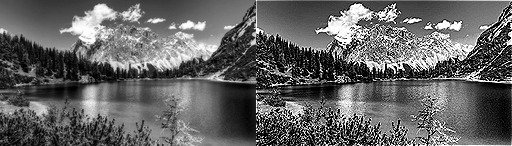

In [31]:
conv.weight.data = torch.tensor([[[
    [0., -1., 0.],
    [-1., 5., -1.],
    [0., -1., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

tensor([[[[ 0., -2.,  0.],
          [-2., 10., -2.],
          [ 0., -2.,  0.]]]])


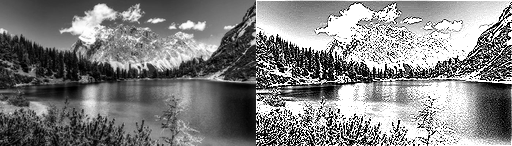

In [32]:
conv.weight.data = torch.tensor([[[
    [0., -2., 0.],
    [-2., 10., -2.],
    [0., -2., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

### Edge detection

tensor([[[[ 0.,  1.,  0.],
          [ 1., -4.,  1.],
          [ 0.,  1.,  0.]]]])


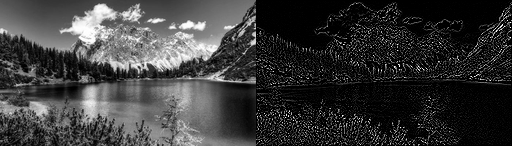

In [33]:
conv.weight.data = torch.tensor([[[
    [0., 1., 0.],
    [1., -4., 1.],
    [0., 1., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

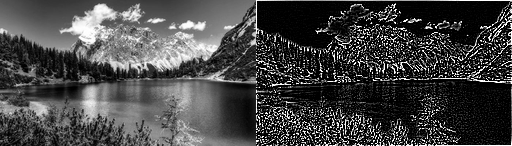

In [34]:
conv.weight.data = torch.tensor([[[
    [-1., -1., -1.],
    [-1., 8., -1.],
    [-1., -1., -1.],
]]])
output = conv(input)
display(input, output)

In [35]:
# TODO: Challenge, hard image with hard transformations

## Los ejercicios que deben agregarse a este proyecto serán los siguientes<a class="anchor" id="exercises" ></a>:

1. Implementa los detectores de línea siguientes usando código en Python (es decir, sin usar librerías de OpenCV): Prewitt, Sobel y Laplaciano. Investiga la complejidad algoritmica de estos, ¿cual es más eficiente?
2. Implementa un algoritmos de realce o mejoramiento de imágenes mediante un algoritmo de en el cual se extraen las líneas de la imagen y después se aplica la diferencia con la imagen original, multiplicando los píxeles de la imagen “máscara” (las líneas encontradas) por un factor alfa mayor a 1.
3. Buscar una aplicación médica (en el libro de Gonzalez viene varios ejemplos de imágenes PET) y hacer mejoramiento usando la técnica de de la Figura 3.43 combinando diferentes etapas de procesamiento de imagenes


1. Implementa los detectores de línea siguientes usando código en Python (es decir, sin usar librerías de OpenCV): Prewitt, Sobel y Laplaciano. Investiga la complejidad algoritmica de estos, ¿cual es más eficiente?

In [132]:
def Conv(img, H):
    m, n = img.shape                         # Obtain number of rows and columns of the image
    img_new = np.zeros([m, n])             # output image, initialized with zeros

    for i in range(1, m-1):
        for j in range(1, n-1):
            temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
            
            img_new[i, j]= temp

    return img_new011

In [142]:
# Low Pass SPatial Domain Filtering
# to observe the blurring effect
import cv2
import numpy as np
      
# Read the image
img = cv2.imread('sample_data/BuildingDrawing.png', 0)

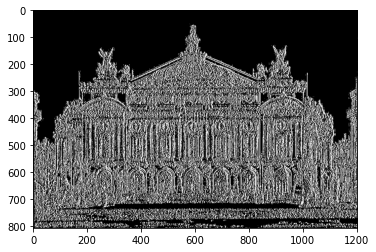

In [143]:
#Prewitt vertical
mask =  np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
mask = mask/9

img_Conv=Conv(img,mask)  
          
img_Conv = img_Conv.astype(np.uint8)
plt.imshow(img_Conv, cmap='gist_gray')
plt.show()

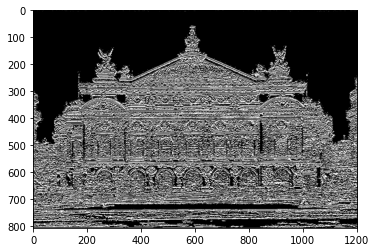

In [144]:
#Prewitt horizontal
mask =  np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  
mask = mask/9

img_Conv=Conv(img,mask)  
          
img_Conv = img_Conv.astype(np.uint8)
plt.imshow(img_Conv, cmap='gist_gray')
plt.show()

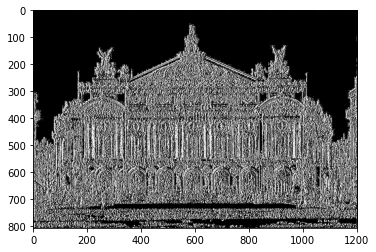

In [145]:
#Sobel vertical
mask =  np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
mask = mask/9

img_Conv=Conv(img,mask)  
          
img_Conv = img_Conv.astype(np.uint8)
plt.imshow(img_Conv, cmap='gist_gray')
plt.show()

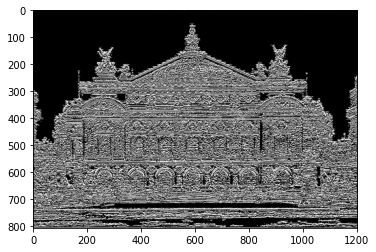

In [146]:
#Sobel horizontal
mask =   np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
mask = mask/9

img_Conv=Conv(img,mask)  
          
img_Conv = img_Conv.astype(np.uint8)
plt.imshow(img_Conv, cmap='gist_gray')
plt.show()

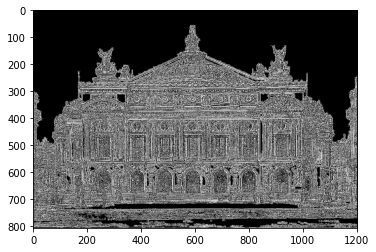

In [147]:
# #laplaciano horizontal

mask = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
mask = mask/9

img_Conv=Conv(img,mask)  
          
img_Conv = img_Conv.astype(np.uint8)
plt.imshow(img_Conv, cmap='gist_gray')
plt.show()

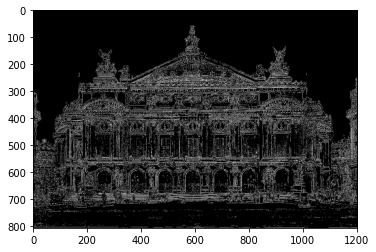

In [148]:
#laplaciano vertical
H = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
mask = mask/9

img_Conv=Conv(img,mask)  
          
img_Conv = img_Conv.astype(np.uint8)
plt.imshow(img_Conv, cmap='gist_gray')
plt.show()

Podemos observar que para los tres metodos Prewitt, Sobel y Laplaciano se utiliza la misma convolución y analizando el algoritmo de la función "Conv" vemos que se tienen varias operaciones simples más dos ciclos 'for' anidados que atribuyen a una complejidad algorítmica de $O(n^{2})$, si observamos que para los tres métodos se utiliza la misma función pasándole como parámetro una máscara diferente por implementación, podemos decir que ninguno es más eficiente que otro, porque realmente los tres cuestan exactamente lo mismo ya que comparten el mismo código.

2. Implementa un algoritmos de realce o mejoramiento de imágenes mediante un algoritmo de en el cual se extraen las líneas de la imagen y después se aplica la diferencia con la imagen original, multiplicando los píxeles de la imagen “máscara” (las líneas encontradas) por un factor alfa mayor a 1.

In [43]:
image2 = Image.open('sample_data/AH.jpeg').convert("L")


In [44]:
#image2 = Image.open('sample_data/dancing-spider.jpg')
image2 = np.array(image2)
image2 = image2.astype(float)

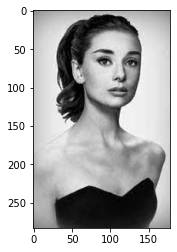

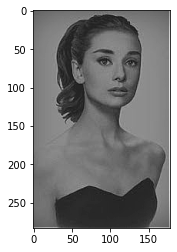

In [56]:
n = 3
H = block_filter(n)
Suavizada = apply_filter(image2, H)

detalle=image2-Suavizada

sharpened=image2+(detalle*1.3)

plt.imshow(image2,cmap='gray')
plt.show()
plt.imshow(sharpened, cmap='gray')
plt.show()

3. Buscar una aplicación médica (en el libro de Gonzalez viene varios ejemplos de imágenes PET) y hacer mejoramiento usando la técnica de de la Figura 3.43 combinando diferentes etapas de procesamiento de imagenes

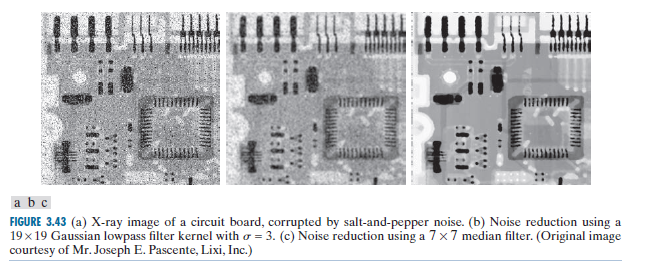

In [82]:
image3 = Image.open('sample_data/Xray.png').convert("L")
image3 = np.array(image3)
image3 = image3.astype(float)


In [83]:
from scipy.ndimage.filters import gaussian_filter as gauss
from scipy.ndimage.filters import median_filter as med

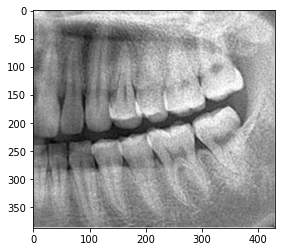

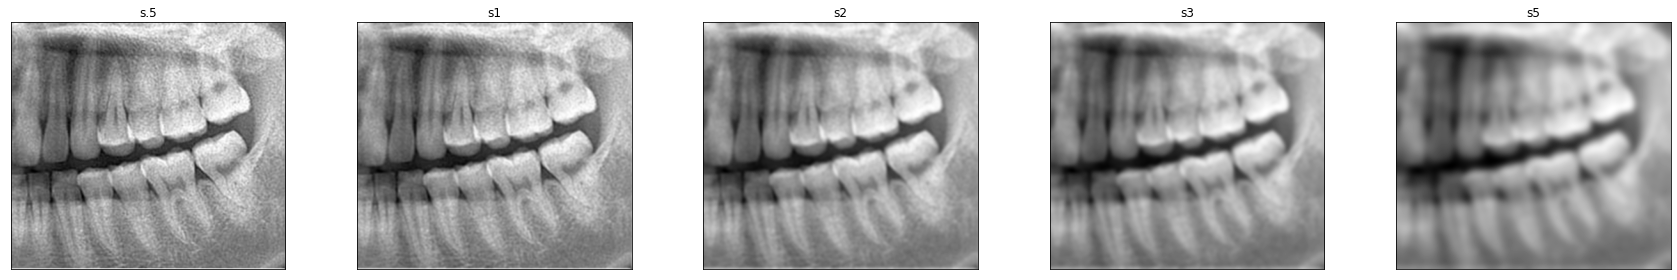

In [84]:
plt.imshow(image3,cmap='gray')
plt.show()

titles = ['s.5', 's1','s2','s3','s5']
SigmaVal=[.5,1,2,3,5]
GaussianImages=[]

i=0
for i in range(5):
  GaussianImages.append(gauss(image3, sigma=SigmaVal[i]))


#original plot size was too small, following code is to have a bigger image
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
i=0
for i in range(5):
    plt.subplot(2,5,i+1),plt.imshow(GaussianImages[i],cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

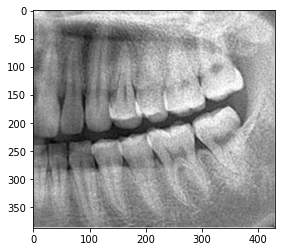

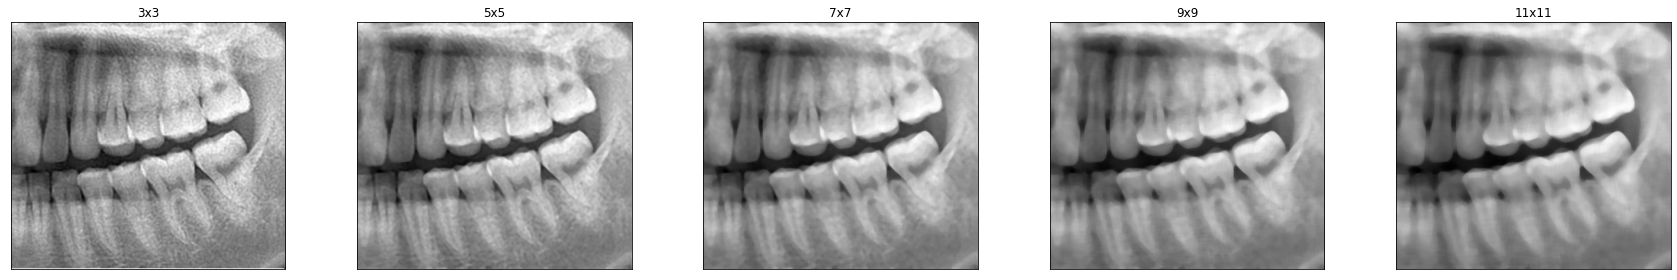

In [80]:

plt.imshow(image3,cmap='gray')
plt.show()
titles = ['3x3', '5x5','7x7','9x9','11x11']
KernelSizeVal=[3,5,7,9,11]
MedianImages=[]

i=0
for i in range(5):
  MedianImages.append(med(image3, size=KernelSizeVal[i]))


#original plot size was too small, following code is to have a bigger image
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
i=0
for i in range(5):
    plt.subplot(2,5,i+1),plt.imshow(MedianImages[i],cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

* https://nikatsanka.github.io/comparing-edge-detection-methods.html
* https://www.geeksforgeeks.org/edge-detection-using-prewitt-scharr-and-sobel-operator/
* https://gist.github.com/rahit/c078cabc0a48f2570028bff397a9e154